In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data = pd.read_excel("energy_plant.xlsx")
print(data.head(5))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [3]:
#seperating data
X = data.iloc[:, :4] # features
y = data.iloc[:, 4] # labels
X = np.array(X)
y = np.array(y)

In [4]:
# Features scaling/noramalization
# After it gradient descent will converge faster
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
def cost_function(X, Y, theta):
    """
    Cost Function
    X --> Feature Matrix
    Y --> An array of target values
    theta --> initial value of theta
    """
    m = len(Y)
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return J

In [6]:
def batch_gradient_descent(X, Y, theta, alpha, iterations):
    """
    Gradient descent:
    X --> Feature Matrix
    Y --> An array of target values
    theta --> initial value of theta
    alpha --> learning rate
    iterations --> max no. of iterations for algorithm
    """
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(theta)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        theta = theta - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [7]:
# We must split the dataset into training and test sets
m = 7000 # total no. of samples
f = 2 # no. of features (first 2 features)

X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train), dtype='int64'), X_train]

y_train = y[:m]

X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'), X_test]

y_test = y[m:]

In [8]:
# Initial Coefficients
theta = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 2000
new_theta, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iter_)

In [9]:
new_theta

array([454.33286521, -11.83093738,  -5.01409897])

In [10]:
def pred(x_test, newB):
    """
    Predict for new numbers & Test for the new numbers
    """
    return x_test.dot(newB)

In [11]:
# Evaluating / Testing the model :
y_ = pred(X_test, new_theta)

Text(0, 0.5, 'Error')

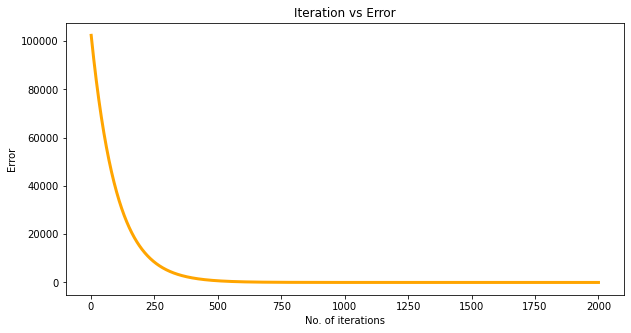

In [12]:
# Draw a cost function
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(cost_history)+1), cost_history, color="orange", linewidth=3)
plt.title("Iteration vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

In [13]:
def r2(y_,y):
    """
    Checking how good is it predicting using R2 score
    """
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

r2(y_,y_test) # 91.40% accuracy

0.91404488821296

In [14]:
# single prediction
ans_ = pred(X_test[3], new_theta)
ans_

429.7312885435843

In [21]:
ans2 = pred(np.array([1.,2.3,3.5]), new_theta) # before inputting any numbers, do not forget to scale them
ans2


409.5723628630549